<a href="https://colab.research.google.com/github/techonair/Machine-Learing-A-Z/blob/main/Reinforcement%20Learning/Thomson%20Sampling%20Algorithm/Thomson_Sampling_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thomson Sampling Algorithm

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Imorting the dataset

In [2]:
from google.colab import files
files.upload()

Saving Ads_CTR_Optimisation.csv to Ads_CTR_Optimisation.csv


{'Ads_CTR_Optimisation.csv': b'Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10\r\n1,0,0,0,1,0,0,0,1,0\r\n0,0,0,0,0,0,0,0,1,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,1,0,0,0,0,0,1,0,0\r\n0,0,0,0,0,0,0,0,0,0\r\n1,1,0,0,0,0,0,0,0,0\r\n0,0,0,1,0,0,0,0,0,0\r\n1,1,0,0,1,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,0,1,0,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,0,0,1,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,1,0\r\n0,0,0,0,0,0,0,1,0,0\r\n0,0,0,0,1,0,0,1,0,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,1,0,0\r\n0,0,0,0,0,0,0,0,1,0\r\n0,1,0,0,0,0,0,1,0,0\r\n0,0,0,0,1,0,0,0,0,1\r\n0,0,0,0,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,1,1,0\r\n0,0,0,0,1,0,1,1,0,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,1,0,0,1,0,0,1,0,0\r\n0,1,0,1,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,0,0,0,1,0,0,1,1,0\r\n1,0,0,0,1,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,0,1\r\n0,0,0,1,0,0,0,0,0,0\r\n0,0,0,0,0,1,0,1,1,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,0,0\r\n0,0,0,1,0,0,0,0,0,0\r\n0,0,0,0,1,0,1,1,0,

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementation of Thomson Sampling

In [6]:
import random

# Step 1
N = 10000 # change this value to lower values to see the effiency of algorithm in both UCB and Thomson Sampling
d = 10
ads_selected = []

# Step 2
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)

    # Step 3
    if (random_beta > max_random):
      max_random = random_beta
      ad =i

  ads_selected.append(i)
  # updating value in [row , column]
  reward = dataset.values[n, ad]
  if reward == 1:
    number_of_rewards_1[ad] += 1
  else:
    number_of_rewards_0[ad] += 1
  
  total_reward = total_reward + reward


## Visualizing the result

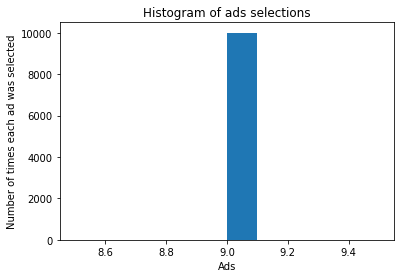

In [7]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

We can clearly see Thomson Sampling beats UCB in identifying the best ad most of the time.